# Exploratory Data Analysis Statistical Interpretation and Visualizations.

In [337]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [338]:


df= pd.read_csv('panic_attack_dataset.csv')
df

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
0,1,56,Female,9,5,Caffeine,134,Yes,No,Yes,...,No,Anxiety,No,2,3,6.4,5,Yes,Yes,5
1,2,46,Male,8,9,Stress,139,Yes,Yes,No,...,No,PTSD,Yes,2,5,5.0,3,No,Yes,7
2,3,32,Female,6,31,PTSD,141,No,Yes,Yes,...,No,Depression,No,4,0,8.3,8,No,Yes,7
3,4,60,Male,5,20,Caffeine,109,Yes,Yes,No,...,Yes,Depression,No,3,3,5.3,8,No,No,1
4,5,25,Non-binary,6,10,Caffeine,101,Yes,No,Yes,...,Yes,Depression,No,3,6,7.2,2,No,No,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,23,Female,0,11,Stress,114,Yes,Yes,Yes,...,Yes,Depression,Yes,5,3,7.9,5,No,Yes,8
1196,1197,41,Male,0,44,Stress,109,Yes,No,No,...,Yes,Anxiety,Yes,4,3,4.3,7,No,Yes,1
1197,1198,50,Male,7,16,Phobia,133,No,Yes,Yes,...,No,Depression,Yes,1,0,8.5,7,No,Yes,8
1198,1199,46,Male,2,17,Unknown,115,Yes,Yes,No,...,Yes,Anxiety,No,4,5,5.4,3,Yes,Yes,9


In [339]:
print(df.isnull().sum())

ID                          0
Age                         0
Gender                      0
Panic_Attack_Frequency      0
Duration_Minutes            0
Trigger                     0
Heart_Rate                  0
Sweating                    0
Shortness_of_Breath         0
Dizziness                   0
Chest_Pain                  0
Trembling                   0
Medical_History           122
Medication                  0
Caffeine_Intake             0
Exercise_Frequency          0
Sleep_Hours                 0
Alcohol_Consumption         0
Smoking                     0
Therapy                     0
Panic_Score                 0
dtype: int64


In [340]:
print(df.duplicated().sum())

0


In [341]:
df['Medical_History'] = df['Medical_History'].fillna(df['Medical_History'].mode()[0])


In [342]:
print(df['Trigger'].unique())

['Caffeine' 'Stress' 'PTSD' 'Social Anxiety' 'Unknown' 'Phobia']


In [343]:
df['Trigger'] = df['Trigger'].replace('Unknown', np.nan)


In [344]:
print(df.isnull().sum())

ID                          0
Age                         0
Gender                      0
Panic_Attack_Frequency      0
Duration_Minutes            0
Trigger                   206
Heart_Rate                  0
Sweating                    0
Shortness_of_Breath         0
Dizziness                   0
Chest_Pain                  0
Trembling                   0
Medical_History             0
Medication                  0
Caffeine_Intake             0
Exercise_Frequency          0
Sleep_Hours                 0
Alcohol_Consumption         0
Smoking                     0
Therapy                     0
Panic_Score                 0
dtype: int64


In [345]:
df['Trigger'] = df['Trigger'].fillna(df['Trigger'].mode()[0])


In [346]:
print(df['Medical_History'].unique())

['Anxiety' 'PTSD' 'Depression']


In [347]:
cleaned_df = df.copy()


In [348]:
cleaned_df.to_csv('cleaned_panic_data.csv', index=False)

In [349]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1200 non-null   int64  
 1   Age                     1200 non-null   int64  
 2   Gender                  1200 non-null   object 
 3   Panic_Attack_Frequency  1200 non-null   int64  
 4   Duration_Minutes        1200 non-null   int64  
 5   Trigger                 1200 non-null   object 
 6   Heart_Rate              1200 non-null   int64  
 7   Sweating                1200 non-null   object 
 8   Shortness_of_Breath     1200 non-null   object 
 9   Dizziness               1200 non-null   object 
 10  Chest_Pain              1200 non-null   object 
 11  Trembling               1200 non-null   object 
 12  Medical_History         1200 non-null   object 
 13  Medication              1200 non-null   object 
 14  Caffeine_Intake         1200 non-null   

In [350]:
cleaned_df.describe()

,ID,Age,Panic_Attack_Frequency,Duration_Minutes,Heart_Rate,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Panic_Score
count,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,41.134167,4.412500,24.39250,120.302500,2.539167,2.955000,6.481583,4.416667,5.569167
std,346.554469,13.543412,2.847648,11.39993,23.369912,1.716854,2.061516,1.405625,2.902598,2.793155
min,1.000000,18.000000,0.000000,5.00000,80.000000,0.000000,0.000000,4.000000,0.000000,1.000000
25%,300.750000,29.000000,2.000000,15.00000,100.000000,1.000000,1.000000,5.300000,2.000000,3.000000
50%,600.500000,42.000000,4.000000,24.00000,121.000000,3.000000,3.000000,6.500000,4.000000,6.000000
75%,900.250000,53.000000,7.000000,34.00000,141.000000,4.000000,5.000000,7.600000,7.000000,8.000000
max,1200.000000,64.000000,9.000000,44.00000,159.000000,5.000000,6.000000,9.000000,9.000000,10.000000


In [351]:
panic_score_descend = cleaned_df.sort_values(by='Panic_Score',ascending=False)
panic_score_descend

,ID,Age,Gender,Panic_Attack_Frequency,Duration_Minutes,Trigger,Heart_Rate,Sweating,Shortness_of_Breath,Dizziness,...,Trembling,Medical_History,Medication,Caffeine_Intake,Exercise_Frequency,Sleep_Hours,Alcohol_Consumption,Smoking,Therapy,Panic_Score
10,11,28,Female,8,20,PTSD,110,No,Yes,No,...,No,PTSD,No,3,4,5.0,9,No,No,10
429,430,36,Female,9,44,Phobia,145,No,No,Yes,...,No,Anxiety,No,1,0,8.2,5,Yes,Yes,10
430,431,45,Male,1,44,PTSD,137,Yes,Yes,No,...,Yes,Depression,No,0,2,8.8,5,No,No,10
336,337,46,Female,8,29,Social Anxiety,91,Yes,Yes,No,...,No,PTSD,Yes,5,5,7.0,7,Yes,No,10
349,350,49,Male,6,20,Phobia,90,Yes,Yes,Yes,...,Yes,Anxiety,No,0,0,5.2,0,Yes,No,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,833,20,Female,3,15,Stress,147,Yes,Yes,Yes,...,Yes,Anxiety,Yes,5,4,8.3,2,No,Yes,1
360,361,41,Male,9,44,PTSD,115,Yes,Yes,Yes,...,Yes,Depression,No,5,0,8.1,6,No,No,1
385,386,62,Male,1,15,Stress,89,Yes,No,No,...,Yes,PTSD,No,0,2,7.1,3,No,No,1
1178,1179,52,Female,3,15,Phobia,128,Yes,Yes,No,...,No,PTSD,No,2,3,6.6,0,Yes,No,1


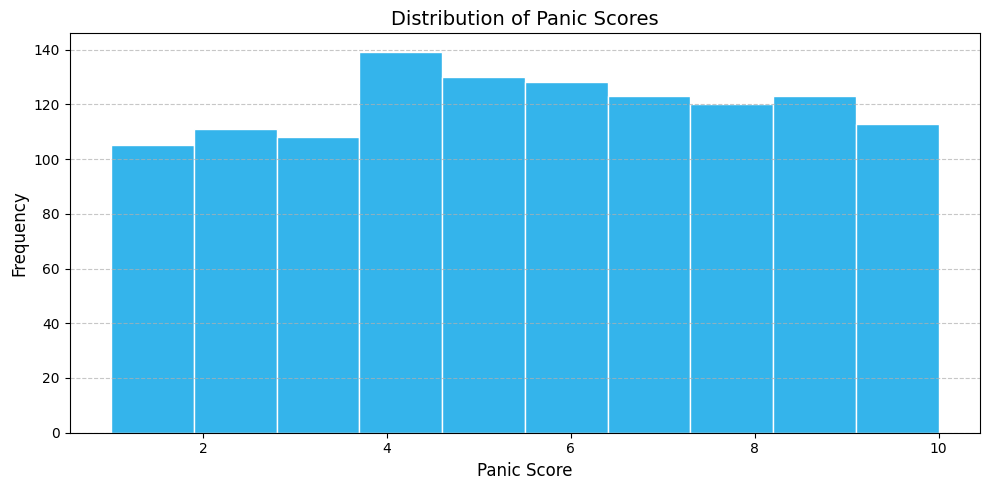

In [352]:
plt.figure(figsize=(10,5))
plt.hist(cleaned_df['Panic_Score'], bins=10, color='#34b4eb', edgecolor='white')
plt.xlabel('Panic Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Panic Scores', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

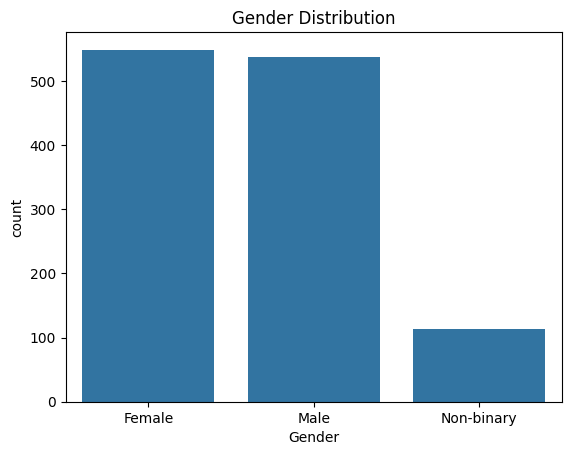

In [353]:
sns.countplot(data=df, x='Gender')
plt.title('Gender Distribution')
plt.show()

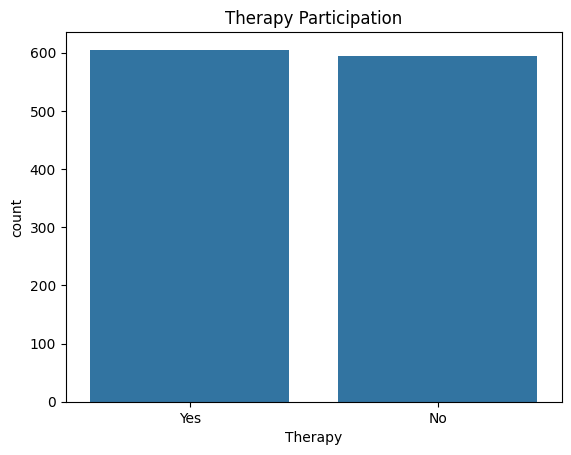

In [354]:
sns.countplot(data=df, x='Therapy')
plt.title('Therapy Participation')
plt.show()

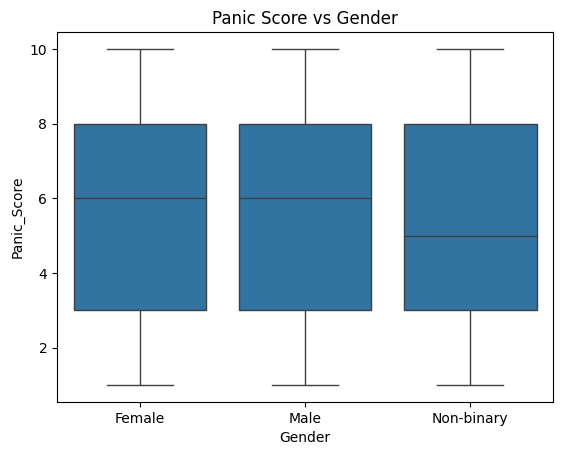

In [355]:
sns.boxplot(data=df, x='Gender', y='Panic_Score')
plt.title('Panic Score vs Gender')
plt.show()

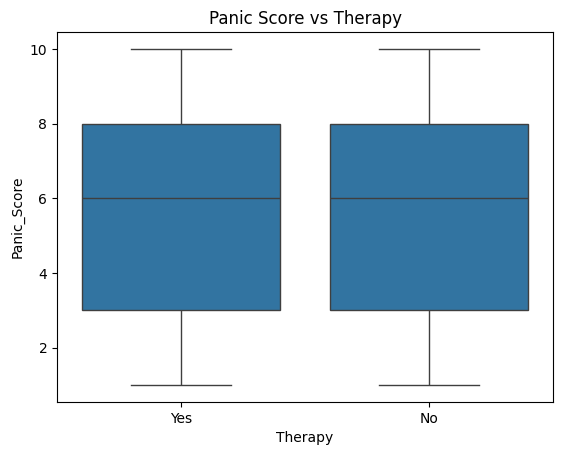

In [356]:
sns.boxplot(data=df, x='Therapy', y='Panic_Score')
plt.title('Panic Score vs Therapy')
plt.show()

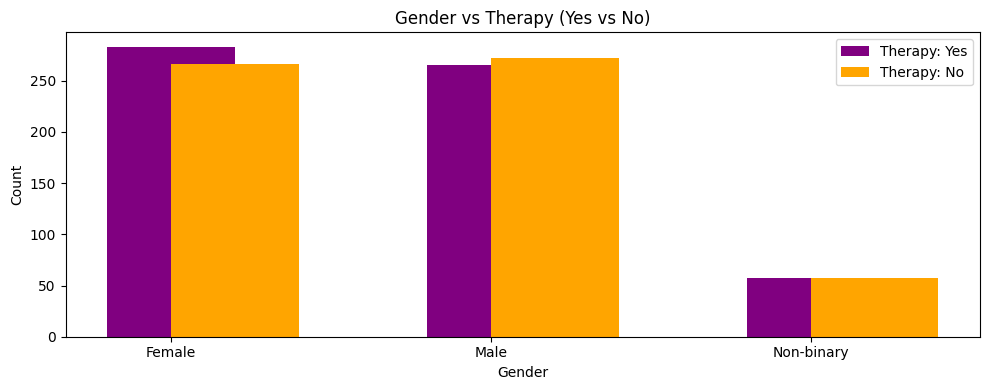

In [357]:

gender_therapy_counts = pd.crosstab(df['Gender'], df['Therapy'])
plt.figure(figsize=(10, 4))
x = range(len(gender_therapy_counts))  
plt.bar(x, gender_therapy_counts['Yes'], width=0.4, label='Therapy: Yes', align='center', color='purple')
plt.bar(x, gender_therapy_counts['No'], width=0.4, label='Therapy: No', align='edge', color='orange')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Therapy (Yes vs No)')
plt.xticks(x, gender_therapy_counts.index)
plt.legend()
plt.tight_layout()
plt.show()


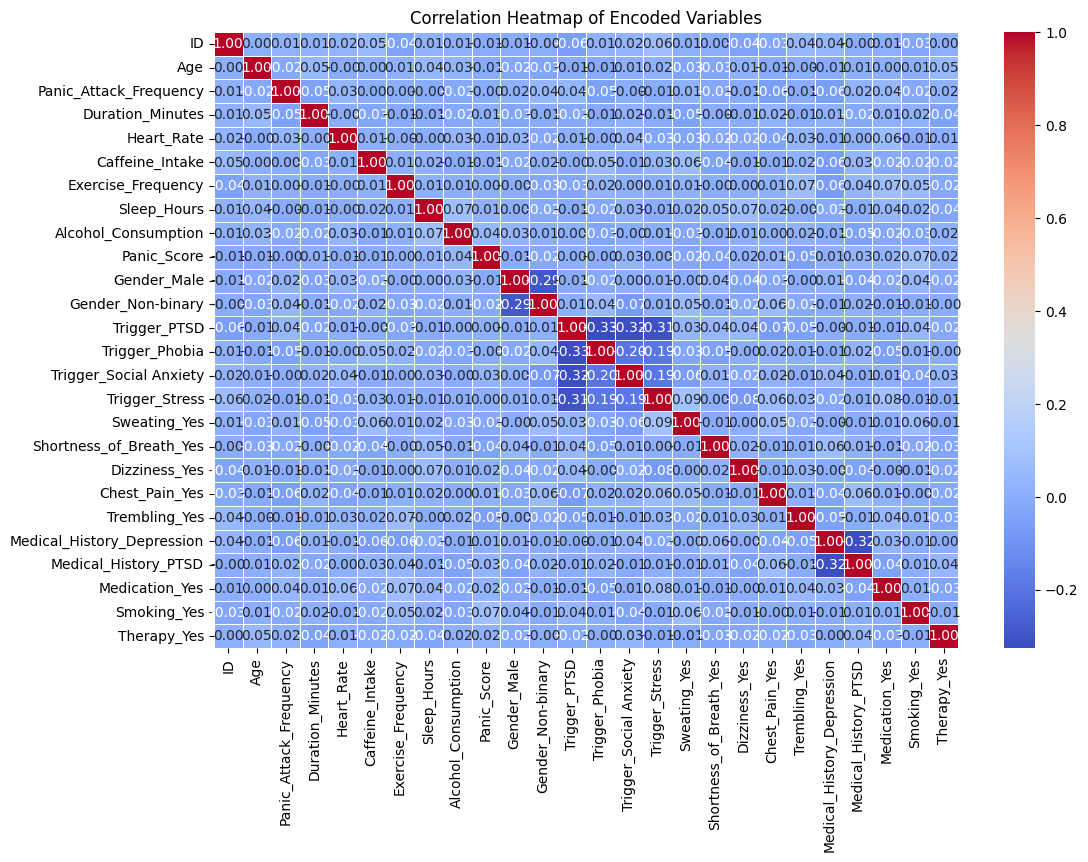

In [358]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Encode categorical columns into numerical format using pd.get_dummies()
df_encoded = pd.get_dummies(df, drop_first=True)

# Step 2: Calculate the correlation matrix for the encoded dataframe
corr_matrix = df_encoded.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))  # Adjust size for readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap of Encoded Variables')
plt.show()


# Logistic Regression from Scratch.Model 1

In [365]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming the DataFrame is `df`
X = df.drop(['ID', 'Panic_Score'], axis=1)  # Drop columns we don't need
y = df['Panic_Score']  # Target column

# List of categorical columns
categorical_cols = ['Gender', 'Trigger', 'Sweating', 'Shortness_of_Breath', 
                    'Dizziness', 'Chest_Pain', 'Trembling', 'Medical_History', 
                    'Medication', 'Smoking', 'Therapy']

# Apply Label Encoding for categorical columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# List of numerical columns
numerical_cols = ['Age', 'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate', 
                  'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption']

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Convert data to numpy arrays and ensure proper shape for logistic regression
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).ravel()  # Ensure y_train is 1D using ravel()
y_test = np.array(y_test).ravel()  # Ensure y_test is 1D using ravel()

# Feature Selection using RFE (Recursive Feature Elimination)
log_reg = LogisticRegression(max_iter=1000)  # Logistic Regression model
rfe = RFE(estimator=log_reg, n_features_to_select=10)  # Select top 10 features
X_train_rfe = rfe.fit_transform(X_train, y_train)  # Fit RFE on training data
X_test_rfe = rfe.transform(X_test)  # Transform test data using the selected features

# Logistic Regression from Scratch
class SimpleLogistic:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])  # Initialize weights
        for _ in range(self.epochs):
            # Sigmoid function for prediction
            y_pred = 1 / (1 + np.exp(-X.dot(self.w)))  
            # Compute gradient
            gradient = X.T.dot(y_pred - y) / len(y)  
            # Update weights using gradient descent
            self.w -= self.lr * gradient  # Update weights

    def predict(self, X):
        # Predict using sigmoid and threshold at 0.5
        return (1 / (1 + np.exp(-X.dot(self.w))) > 0.5).astype(int)

# Train and Evaluate Logistic Regression Model using RFE-selected features
log_model = SimpleLogistic(lr=0.1, epochs=1000)
log_model.fit(X_train_rfe, y_train)
log_preds = log_model.predict(X_test_rfe)

print("Logistic Regression with Feature Selection (RFE)")
print("Accuracy:", accuracy_score(y_test, log_preds))
print("Classification Report:\n", classification_report(y_test, log_preds, zero_division=0))  # Handling division by zero

Logistic Regression with Feature Selection (RFE)
Accuracy: 0.0875
Classification Report:
               precision    recall  f1-score   support

           1       0.09      1.00      0.16        21
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        22
           4       0.00      0.00      0.00        28
           5       0.00      0.00      0.00        26
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00        24
           8       0.00      0.00      0.00        24
           9       0.00      0.00      0.00        25
          10       0.00      0.00      0.00        23

    accuracy                           0.09       240
   macro avg       0.01      0.10      0.02       240
weighted avg       0.01      0.09      0.01       240



In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)
plt.plot(train_sizes, train_scores.mean(axis=1), label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), label="Test score")
plt.xlabel("Training size")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend()
plt.show()


# Model 2

In [362]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming the DataFrame is `df`
X = df.drop(['ID', 'Panic_Score'], axis=1)  # Drop columns we don't need
y = df['Panic_Score']  # Target column

# List of categorical columns
categorical_cols = ['Gender', 'Trigger', 'Sweating', 'Shortness_of_Breath', 
                    'Dizziness', 'Chest_Pain', 'Trembling', 'Medical_History', 
                    'Medication', 'Smoking', 'Therapy']

# Apply Label Encoding for categorical columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# List of numerical columns
numerical_cols = ['Age', 'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate', 
                  'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption']

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Convert data to numpy arrays and ensure proper shape
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Decision Tree Model from Scratch
class DecisionTree:
    def __init__(self, max_depth=5):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)
        
        # Stopping criteria
        if len(unique_classes) == 1:  # Pure node
            return unique_classes[0]
        if depth >= self.max_depth or n_samples <= 1:
            return np.bincount(y).argmax()  # Return the most frequent class
        
        # Best split
        best_split = self._best_split(X, y)
        left_tree = self._build_tree(X[best_split['left_indices']], y[best_split['left_indices']], depth + 1)
        right_tree = self._build_tree(X[best_split['right_indices']], y[best_split['right_indices']], depth + 1)
        
        return {'feature': best_split['feature'], 'value': best_split['value'], 'left': left_tree, 'right': right_tree}

    def _best_split(self, X, y):
        best_split = {}
        best_gini = float('inf')

        n_samples, n_features = X.shape
        for feature_index in range(n_features):
            feature_values = X[:, feature_index]
            unique_values = np.unique(feature_values)

            for value in unique_values:
                left_indices = np.where(feature_values <= value)[0]
                right_indices = np.where(feature_values > value)[0]

                left_y = y[left_indices]
                right_y = y[right_indices]
                
                gini = self._gini_impurity(left_y, right_y)

                if gini < best_gini:
                    best_gini = gini
                    best_split = {'feature': feature_index, 'value': value, 
                                  'left_indices': left_indices, 'right_indices': right_indices}
        
        return best_split

    def _gini_impurity(self, left_y, right_y):
        left_size = len(left_y)
        right_size = len(right_y)
        total_size = left_size + right_size

        left_gini = 1 - sum([(np.sum(left_y == label) / left_size) ** 2 for label in np.unique(left_y)])
        right_gini = 1 - sum([(np.sum(right_y == label) / right_size) ** 2 for label in np.unique(right_y)])

        return (left_size / total_size) * left_gini + (right_size / total_size) * right_gini

    def predict(self, X):
        return np.array([self._predict_sample(x, self.tree) for x in X])

    def _predict_sample(self, x, tree):
        if isinstance(tree, dict):
            if x[tree['feature']] <= tree['value']:
                return self._predict_sample(x, tree['left'])
            else:
                return self._predict_sample(x, tree['right'])
        return tree

# Train and Evaluate Decision Tree Model
tree_model = DecisionTree(max_depth=5)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, tree_preds))
print("Classification Report:\n", classification_report(y_test, tree_preds))


Decision Tree
Accuracy: 0.10416666666666667
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        21
           2       0.00      0.00      0.00        22
           3       0.17      0.05      0.07        22
           4       0.12      0.25      0.16        28
           5       0.13      0.50      0.21        26
           6       0.25      0.04      0.07        25
           7       0.06      0.08      0.07        24
           8       0.00      0.00      0.00        24
           9       0.12      0.04      0.06        25
          10       0.00      0.00      0.00        23

    accuracy                           0.10       240
   macro avg       0.09      0.10      0.06       240
weighted avg       0.09      0.10      0.07       240



In [367]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Assuming the DataFrame is `df`
X = df.drop(['ID', 'Panic_Score'], axis=1)  # Drop unnecessary columns
y = df['Panic_Score']  # Target column

# List of categorical columns
categorical_cols = ['Gender', 'Trigger', 'Sweating', 'Shortness_of_Breath', 
                    'Dizziness', 'Chest_Pain', 'Trembling', 'Medical_History', 
                    'Medication', 'Smoking', 'Therapy']

# Apply Label Encoding for categorical columns
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# List of numerical columns
numerical_cols = ['Age', 'Panic_Attack_Frequency', 'Duration_Minutes', 'Heart_Rate', 
                  'Caffeine_Intake', 'Exercise_Frequency', 'Sleep_Hours', 'Alcohol_Consumption']

# Scale numerical features
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Initialize a Decision Tree Classifier (You can replace it with Logistic Regression)
best_model = DecisionTreeClassifier(random_state=42)

# Feature Selection using RFE (Recursive Feature Elimination)
rfe = RFE(estimator=best_model, n_features_to_select=10)  # Select the top 10 features
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Define hyperparameter grid for Decision Tree (or Logistic Regression if needed)
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    
}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=best_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_selected, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Rebuild the model with the best hyperparameters and selected features
best_model_rebuilt = DecisionTreeClassifier(random_state=42, 
                                            max_depth=best_params['max_depth'],
                                            min_samples_split=best_params['min_samples_split'],
                                            min_samples_leaf=best_params['min_samples_leaf'])

# Train the model
best_model_rebuilt.fit(X_train_selected, y_train)

# Make predictions
y_pred = best_model_rebuilt.predict(X_test_selected)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.09583333333333334
Classification Report:
               precision    recall  f1-score   support

           1       0.09      0.10      0.09        21
           2       0.13      0.14      0.13        22
           3       0.04      0.05      0.04        22
           4       0.09      0.07      0.08        28
           5       0.08      0.12      0.10        26
           6       0.00      0.00      0.00        25
           7       0.06      0.08      0.07        24
           8       0.14      0.12      0.13        24
           9       0.14      0.12      0.13        25
          10       0.21      0.17      0.19        23

    accuracy                           0.10       240
   macro avg       0.10      0.10      0.10       240
weighted avg       0.10      0.10      0.10       240

